# Cleaning and analyzing Avengers data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
avengers = pd.read_csv("avengers.csv",encoding="windows-1252")
avengers.head(5)

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [5]:
avengers.shape

(173, 21)

# Creating a column containing total number of death

In [6]:
avengers['Death1'].value_counts()

NO     104
YES     69
Name: Death1, dtype: int64

In [8]:
avengers['Death2'].value_counts(dropna=False)

NaN    156
YES     16
NO       1
Name: Death2, dtype: int64

In [9]:
avengers['Death3'].value_counts(dropna=False)

NaN    171
YES      2
Name: Death3, dtype: int64

In [10]:
avengers['Death4'].value_counts(dropna=False)

NaN    172
YES      1
Name: Death4, dtype: int64

In [11]:
avengers['Death5'].value_counts(dropna=False)

NaN    172
YES      1
Name: Death5, dtype: int64

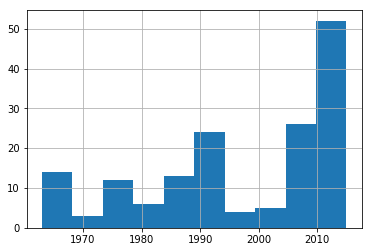

In [13]:
true_avengers = avengers[avengers['Year']>1959]

true_avengers['Year'].hist()

In [14]:
death = avengers[['Death1','Death2','Death3','Death4','Death5']]

death = death.replace("YES",1)
death = death.replace("NO",0)
death = death.replace(np.nan,0)
true_avengers['Deaths'] = death.sum(axis=1)

C:\Users\PRATIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Verifying years since joining

In [15]:
ref_year = 2015

In [16]:
true_avengers.dtypes

URL                             object
Name/Alias                      object
Appearances                      int64
Current?                        object
Gender                          object
Probationary Introl             object
Full/Reserve Avengers Intro     object
Year                             int64
Years since joining              int64
Honorary                        object
Death1                          object
Return1                         object
Death2                          object
Return2                         object
Death3                          object
Return3                         object
Death4                          object
Return4                         object
Death5                          object
Return5                         object
Notes                           object
Deaths                         float64
dtype: object

In [18]:
joined_accuracy_count  = int()

correct_ysj = true_avengers[(true_avengers['Years since joining'] + true_avengers['Year']) == ref_year]

joined_accuracy_count = correct_ysj.shape[0]

print(joined_accuracy_count)

159


### From the above output it is clear that most values are correct for the 'Years since joining column'